In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("Delhi_v2.csv")
df.shape

(7738, 18)

In [36]:
df.head(4)

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429


In [37]:
df.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

## Data Preprocessing

### Droping insignificant data and handling null values

In [38]:
df1 = df.drop(['Unnamed: 0', 'latitude', 'longitude', 'Status', 'Landmarks', 'desc', 'Lift', 'neworold', 'parking'],   axis =1)
df1

,price,Address,area,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,NaN,NaN,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,NaN,Semi-Furnished,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,NaN,Unfurnished,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Unfurnished,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,NaN,Flat,4592.592593
...,...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,NaN,NaN,Flat,7214.611872
7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,2.0,2.0,3.0,Semi-Furnished,Flat,4254.716981
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,NaN,Flat,3688.092729
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,NaN,Flat,4642.857143


In [39]:
df1.isna().sum()

price                  0
Address                0
area                   0
Bedrooms               0
Bathrooms              0
Balcony             2572
Furnished_status    3614
type_of_building       0
Price_sqft             0
dtype: int64

In [40]:
df1['Balcony'].fillna(0, inplace = True)
df1

,price,Address,area,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,NaN,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Semi-Furnished,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Unfurnished,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Unfurnished,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,NaN,Flat,4592.592593
...,...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,NaN,Flat,7214.611872
7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,2.0,2.0,3.0,Semi-Furnished,Flat,4254.716981
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,NaN,Flat,3688.092729
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,NaN,Flat,4642.857143


In [41]:
df1.groupby(['Furnished_status'])['Furnished_status'].agg('count')

Furnished_status
Furnished          695
Semi-Furnished    2199
Unfurnished       1230
Name: Furnished_status, dtype: int64

In [42]:
df2 = df1.drop('Furnished_status', axis = 1)
df2

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,3.0,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,3.0,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872
7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,2.0,2.0,3.0,Flat,4254.716981
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,Flat,3688.092729
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Flat,4642.857143


In [43]:
df2.describe()

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,2.501163,1.619928,5543.660241
std,7.223197e+06,718.929581,0.877026,0.867050,1.445901,2408.659307
min,1.700000e+06,501.000000,2.000000,2.000000,0.000000,2100.000000
25%,4.200000e+06,990.000000,2.000000,2.000000,0.000000,3950.986915
50%,6.000000e+06,1250.000000,3.000000,2.000000,2.000000,4972.674332
75%,9.500000e+06,1650.000000,3.000000,3.000000,3.000000,6350.638693
max,8.500000e+07,9500.000000,10.000000,10.000000,10.000000,44378.698225


In [44]:
loc = df2.groupby('Address')['Address'].agg('count').sort_values(ascending = False)
loc

Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                            163
Indirapuram, Ghaziabad, Delhi NCR                                    152
Greater Noida West, Greater Noida, Delhi NCR                         100
Noida Extension, Noida, Delhi NCR                                     63
Crossings Republik, Ghaziabad, Delhi NCR                              61
                                                                    ... 
Godrej woods sector 43, Sector 43, Noida, Delhi NCR                    1
Golf Course Road, Gurgaon, Delhi NCR                                   1
Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR            1
Golf course Ex-road sec 68 gurgaon, Sector 68, Gurgaon, Delhi NCR      1
zeta 1, Zeta 1, Greater Noida, Delhi NCR                               1
Name: Address, Length: 4145, dtype: int64

In [45]:
loc10 = loc[loc<10]
loc10

Address
Mehrauli, New Delhi - South, Delhi NCR                               9
Pratap Vihar, Ghaziabad, Delhi NCR                                   9
Sector 76, Noida, Sector 76, Noida, Delhi NCR                        9
Wave City, Ghaziabad, Delhi NCR                                      9
Mahavir Enclave Part 1, New Delhi - Dwarka, Delhi NCR                9
                                                                    ..
Godrej woods sector 43, Sector 43, Noida, Delhi NCR                  1
Golf Course Road, Gurgaon, Delhi NCR                                 1
Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR          1
Golf course Ex-road sec 68 gurgaon, Sector 68, Gurgaon, Delhi NCR    1
zeta 1, Zeta 1, Greater Noida, Delhi NCR                             1
Name: Address, Length: 4041, dtype: int64

In [46]:
df2['Address'] = df2['Address'].apply(lambda x: 'other' if x in loc10 else x)

In [47]:
df2

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
3,3810000.0,other,1050.0,2.0,2.0,3.0,Flat,3628.571429
4,6200000.0,other,1350.0,2.0,2.0,3.0,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872
7734,4510000.0,other,1060.0,2.0,2.0,3.0,Flat,4254.716981
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,Flat,3688.092729
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Flat,4642.857143


### Outlier detection and removal

In [48]:
df2[(df2['area']/df2['Bedrooms'])<250]

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
47,4800000.0,other,1232.0,6.0,3.0,2.0,Flat,3896.103896
377,3500000.0,other,700.0,3.0,2.0,1.0,Individual House,5000.000000
775,6000000.0,other,700.0,3.0,3.0,1.0,Flat,8571.428571
806,5000000.0,other,890.0,5.0,2.0,1.0,Flat,5617.977528
1094,14000000.0,other,720.0,8.0,4.0,4.0,Flat,19444.444444
...,...,...,...,...,...,...,...,...
6562,7000000.0,other,900.0,4.0,4.0,0.0,Flat,7777.777778
7044,6500000.0,other,560.0,3.0,2.0,0.0,Flat,11607.142857
7253,10000000.0,other,1000.0,6.0,6.0,3.0,Individual House,10000.000000
7285,4000000.0,other,700.0,3.0,2.0,1.0,Flat,5714.285714


In [49]:
df3 = df2[~((df2['area']/df2['Bedrooms'])<250)]
df3

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
3,3810000.0,other,1050.0,2.0,2.0,3.0,Flat,3628.571429
4,6200000.0,other,1350.0,2.0,2.0,3.0,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872
7734,4510000.0,other,1060.0,2.0,2.0,3.0,Flat,4254.716981
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,4.0,3.0,5.0,Flat,3688.092729
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Flat,4642.857143


In [50]:
df3[(df3['Balcony']>df3['Bedrooms'])]

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
3,3810000.0,other,1050.0,2.0,2.0,3.0,Flat,3628.571429
4,6200000.0,other,1350.0,2.0,2.0,3.0,Flat,4592.592593
5,3700000.0,other,1150.0,2.0,2.0,3.0,Flat,3217.391304
6,3270000.0,other,890.0,2.0,2.0,3.0,Flat,3674.157303
9,5500000.0,other,1400.0,3.0,3.0,4.0,Flat,3928.571429
...,...,...,...,...,...,...,...,...
7721,6500000.0,"Sector 137, Noida, Sector 137, Noida, Delhi NCR",1045.0,2.0,2.0,3.0,Flat,6220.095694
7727,4400000.0,other,980.0,2.0,2.0,3.0,Flat,4489.795918
7732,6200000.0,other,1045.0,2.0,2.0,4.0,Flat,5933.014354
7734,4510000.0,other,1060.0,2.0,2.0,3.0,Flat,4254.716981


In [51]:
df4 = df3[~(df3['Balcony']>df3['Bedrooms'])]
df4

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
7,3990000.0,other,850.0,2.0,2.0,1.0,Flat,4694.117647
8,3500000.0,other,960.0,2.0,2.0,2.0,Flat,3645.833333
...,...,...,...,...,...,...,...,...
7730,3800000.0,"Omicron 1, Greater Noida, Delhi NCR",955.0,2.0,2.0,0.0,Flat,3979.057592
7731,5500000.0,other,970.0,2.0,2.0,0.0,Flat,5670.103093
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Flat,4642.857143


In [52]:
df4.describe()

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft
count,6.447000e+03,6447.000000,6447.000000,6447.000000,6447.000000,6447.000000
mean,8.531517e+06,1419.295021,2.729797,2.509229,1.245696,5612.977890
std,7.507068e+06,743.029596,0.840278,0.864475,1.206098,2334.382811
min,1.700000e+06,501.000000,2.000000,2.000000,0.000000,2100.000000
25%,4.200000e+06,968.000000,2.000000,2.000000,0.000000,4000.000000
50%,6.000000e+06,1250.000000,3.000000,2.000000,1.000000,5000.000000
75%,1.000000e+07,1655.000000,3.000000,3.000000,2.000000,6469.124963
max,8.500000e+07,9000.000000,10.000000,10.000000,10.000000,25925.925926


In [53]:
q3, q1 = np.percentile(df4['Price_sqft'], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
upper_bound, lower_bound

(10172.812408545507, 296.3125548726953)

In [54]:
df5 = df4[(df4['Price_sqft']<= upper_bound) & (df4['Price_sqft']>=  lower_bound)]
df5

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
7,3990000.0,other,850.0,2.0,2.0,1.0,Flat,4694.117647
8,3500000.0,other,960.0,2.0,2.0,2.0,Flat,3645.833333
...,...,...,...,...,...,...,...,...
7730,3800000.0,"Omicron 1, Greater Noida, Delhi NCR",955.0,2.0,2.0,0.0,Flat,3979.057592
7731,5500000.0,other,970.0,2.0,2.0,0.0,Flat,5670.103093
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,3.0,3.0,2.0,Flat,4642.857143


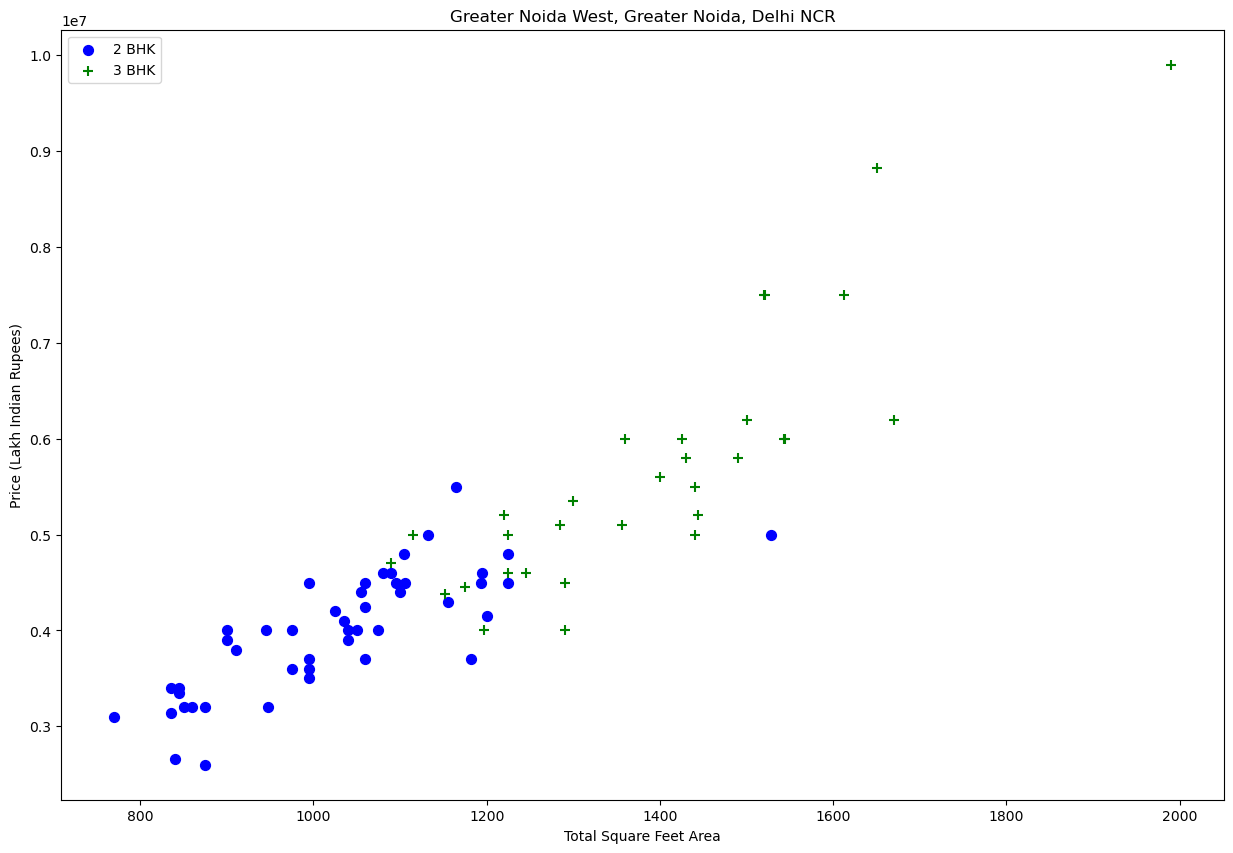

In [55]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Address==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.Address==location) & (df.Bedrooms==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Greater Noida West, Greater Noida, Delhi NCR")

### Removing abrupt values basing on the idea that a 3 bedroom house in a locality will be costlier than avg price of 2 bedroom houses of similar sqft area in the same locality

In [56]:
def remove_bd_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Address'):
        bd_stats = {}
        for bd, bd_df in location_df.groupby('Bedrooms'):
            bd_stats[bd] = {
                'mean': np.mean(bd_df.Price_sqft),
                'std': np.std(bd_df.Price_sqft),
                'count': bd_df.shape[0]
            }
        for bd, bd_df in location_df.groupby('Bedrooms'):
            stats = bd_stats.get(bd-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bd_df[bd_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bd_outliers(df5)
df6

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
7,3990000.0,other,850.0,2.0,2.0,1.0,Flat,4694.117647
8,3500000.0,other,960.0,2.0,2.0,2.0,Flat,3645.833333
10,7300000.0,other,850.0,3.0,2.0,1.0,Flat,8588.235294
...,...,...,...,...,...,...,...,...
7729,8100000.0,other,1600.0,3.0,3.0,3.0,Flat,5062.500000
7730,3800000.0,"Omicron 1, Greater Noida, Delhi NCR",955.0,2.0,2.0,0.0,Flat,3979.057592
7731,5500000.0,other,970.0,2.0,2.0,0.0,Flat,5670.103093
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872


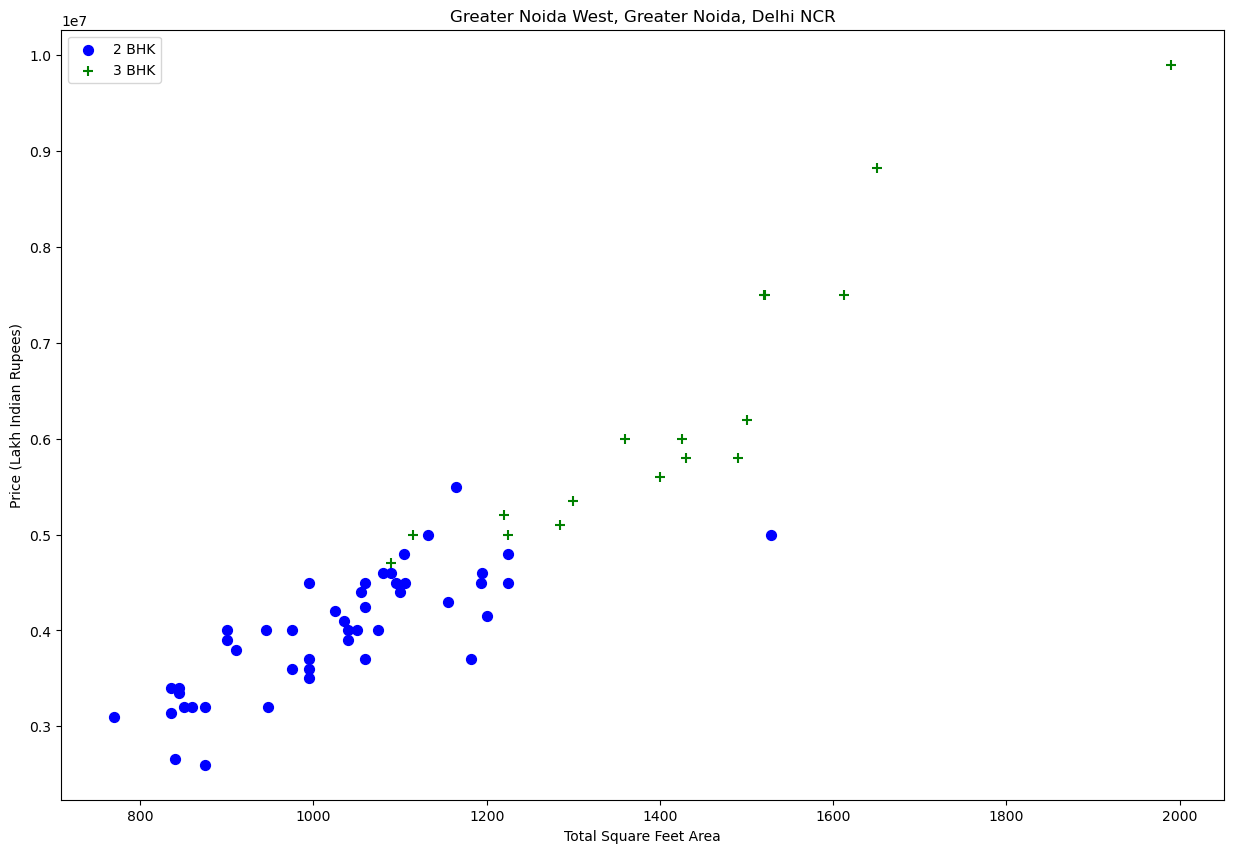

In [57]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Address==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.Address==location) & (df.Bedrooms==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Greater Noida West, Greater Noida, Delhi NCR")

In [58]:
df6[df6['Bathrooms']>(df6['Bedrooms']+2)]

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
2299,45000000.0,other,5000.0,4.0,7.0,4.0,Flat,9000.000000
2902,35000000.0,other,5200.0,5.0,9.0,0.0,Individual House,6730.769231
3101,14000000.0,other,2370.0,4.0,7.0,0.0,Flat,5907.172996
4599,40000000.0,"Sector 67, Gurgaon, Delhi NCR",6000.0,5.0,8.0,0.0,Flat,6666.666667


In [59]:
df7 = df6[~(df6['Bathrooms']>(df6['Bedrooms']+2))]
Sno = np.arange(0, 4802)
df7 = df7.set_index(Sno)
df7

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994
2,3990000.0,other,850.0,2.0,2.0,1.0,Flat,4694.117647
3,3500000.0,other,960.0,2.0,2.0,2.0,Flat,3645.833333
4,7300000.0,other,850.0,3.0,2.0,1.0,Flat,8588.235294
...,...,...,...,...,...,...,...,...
4797,8100000.0,other,1600.0,3.0,3.0,3.0,Flat,5062.500000
4798,3800000.0,"Omicron 1, Greater Noida, Delhi NCR",955.0,2.0,2.0,0.0,Flat,3979.057592
4799,5500000.0,other,970.0,2.0,2.0,0.0,Flat,5670.103093
4800,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872


### One Hot encoding the categorical data

In [60]:
dummies = pd.get_dummies(df7['Address'])
dummies

,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","DLF Ankur Vihar, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR","Eta 2, Greater Noida, Delhi NCR","Govindpuram, Ghaziabad, Delhi NCR","Greater Noida West, Greater Noida, Delhi NCR",...,"Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dum = pd.get_dummies(df7['type_of_building'])
d = pd.concat([dummies, dum], axis = 'columns')
df8 = pd.concat([df7,d], axis = 'columns')
df8

,price,Address,area,Bedrooms,Bathrooms,Balcony,type_of_building,Price_sqft,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR",...,"Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",other,Flat,Individual House
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148,0,0,...,0,0,0,0,0,0,0,0,1,0
1,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,0.0,Flat,6918.238994,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3990000.0,other,850.0,2.0,2.0,1.0,Flat,4694.117647,0,0,...,0,0,0,0,0,0,0,1,1,0
3,3500000.0,other,960.0,2.0,2.0,2.0,Flat,3645.833333,0,0,...,0,0,0,0,0,0,0,1,1,0
4,7300000.0,other,850.0,3.0,2.0,1.0,Flat,8588.235294,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,8100000.0,other,1600.0,3.0,3.0,3.0,Flat,5062.500000,0,0,...,0,0,0,0,0,0,0,1,1,0
4798,3800000.0,"Omicron 1, Greater Noida, Delhi NCR",955.0,2.0,2.0,0.0,Flat,3979.057592,0,0,...,0,0,0,0,0,0,0,0,1,0
4799,5500000.0,other,970.0,2.0,2.0,0.0,Flat,5670.103093,0,0,...,0,0,0,0,0,0,0,1,1,0
4800,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,2.0,2.0,0.0,Flat,7214.611872,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
df9 = df8.drop(['Address', 'other', 'Price_sqft', 'type_of_building', 'Flat'], axis = 'columns')
df9

,price,area,Bedrooms,Bathrooms,Balcony,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR",...,"Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",Individual House
0,5600000.0,1350.0,3.0,3.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16500000.0,2385.0,4.0,5.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3990000.0,850.0,2.0,2.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3500000.0,960.0,2.0,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7300000.0,850.0,3.0,2.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,8100000.0,1600.0,3.0,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,3800000.0,955.0,2.0,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,5500000.0,970.0,2.0,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,7900000.0,1095.0,2.0,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = df9.drop('price', axis = 'columns')
X

,area,Bedrooms,Bathrooms,Balcony,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","DLF Ankur Vihar, Ghaziabad, Delhi NCR",...,"Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",Individual House
0,1350.0,3.0,3.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2385.0,4.0,5.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,850.0,2.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,960.0,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,850.0,3.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,1600.0,3.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,955.0,2.0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,970.0,2.0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,1095.0,2.0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = df9['price']

## Model training and hyperparameter tuning using GridSearchCV library

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8911471722496398

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv = 5)

array([0.90115631, 0.90230327, 0.9194243 , 0.80130314, 0.87812487])

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_gridsearchcv(X,y):
    models = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2,3],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for model_name, config in models.items():
        g =  GridSearchCV(config['model'], config['params'], cv=5)
        g.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': g.best_score_,
            'best_params': g.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.880462,{'normalize': True}
1,lasso,0.880464,"{'alpha': 3, 'selection': 'cyclic'}"
2,decision_tree,0.830292,"{'criterion': 'mse', 'splitter': 'random'}"


In [68]:
def predict_price(area, Bed, Bath, Balc, loc, typ):
    loc_ind = np.where(X.columns == loc)[0]
    typ_ind = np.where(X.columns == typ)[0]
    h = np.zeros(len(X.columns))
    h[0] = area
    h[1] = Bed
    h[2] = Bath
    h[3] = Balc
    if loc_ind>=0:
        if typ_ind>=0:
            h[typ_ind]=1
            h[loc_ind]=1
        h[loc_ind] = 1
    if typ_ind>=0:
            h[typ_ind]=1
    
    return lr.predict([h])

In [69]:
predict_price(1500, 3, 3, 3, 'Bhopura, Ghaziabad, Delhi NCR', 'Flat')

C:\Users\91878\AppData\Local\Temp\ipykernel_17072\3682826751.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if typ_ind>=0:
C:\Users\91878\AppData\Local\Temp\ipykernel_17072\3682826751.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if typ_ind>=0:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7218683.59542084])

In [70]:
predict_price(1400, 3, 3, 3, 'DLF Ankur Vihar, Ghaziabad, Delhi NCR', 'Individual House')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8049387.3708039])

## Saving the model and necessary files

In [71]:
import pickle
with open('Delhi_HousePrice_Prediction.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [72]:
addrss = df9.columns[5:-1].to_list()
addrss.append('other')

In [73]:
import pickle
with open('addresses.pkl', 'wb') as f:
    pickle.dump(addrss, f)

In [74]:
a = X.to_dict()

In [75]:
import pickle
with open('features.pkl', 'wb') as f:
    pickle.dump(a, f)